In [2]:
import itertools
import numpy as np
import pandas as pd
import random as rnd
import networkx as nx
import matplotlib.pyplot as plt

from pprint import pprint
import warnings; warnings.filterwarnings('ignore')

In [3]:
# Cities and their length (Costs)
L = np.array([
    [0, 4, 5, 1, 9],
    [4, 0, 3, 7, 4],
    [5, 3, 0, 5, 2],
    [1, 7, 5, 0, 1],
    [9, 4, 2, 1, 0]
])

In [4]:
# Default phermpone value is 1
pheromone = np.full((5, 5), 0.1, dtype=float) 

In [5]:
n_ants = 20  # Number of ants
alpha = 3  # 
beta = 1  #

RO = 0.1  # ρ: Evaporation
Q = 1

max_iter = 100

# η: quality of the path 1/L
# L: length of the path between i and j nodes

In [6]:
cities = [city for city in range(len(L))]

In [7]:
ants = []

In [8]:
def cycle():
    global ants
    # K trip which makes a cycle
    for k in range(n_ants):
        # N step which makes a trip
        for _ in range(len(cities) - 1):
            available_cities = [city for city in cities if city not in ants[k]]
            # print(k, ':', available_cities)

            # Current_position
            i = ants[k][-1]

            v = 0
            # j is next city
            for j in available_cities:
                v +=  (pheromone[i][j] ** alpha) * (eta(i, j) ** beta)

            p = {}
            for j in available_cities:
                p[j] = (pheromone[i][j] ** alpha) * (eta(i, j) ** beta) / v

            ants[k].append(roulette_wheel(p))

In [9]:
def init():
    global ants
    # Init ants on a random place
    ants = [[] for k in range(n_ants)]
    for i in range(n_ants):
        ants[i].append(rnd.choice(cities)) 

In [10]:
eta = lambda i, j : 1 / L[i][j]

In [11]:
def roulette_wheel(p):
    random = rnd.uniform(0, sum(p.values()))
    position = 0
    for key, value in p.items():
        position += value
        if position > random:
            return key

In [12]:
def show_matrix(matrix):
    x = len(matrix)
    
    G = nx.Graph()

    positions = [(2, 0), (8, 0), (5, 3), (1, 2), (9, 2)]
    if x != 5:
        positions = [(np.random.randint(1,20), np.random.randint(20,30)) for i in range(x)]

    for i, pos in enumerate(positions):
        G.add_node(i, pos=pos)
        for j in range(x):
            G.add_edge(i, j, weight=(matrix[i][j]))

    weights = nx.get_edge_attributes(G,'weight')        
    pos=nx.get_node_attributes(G,'pos')
    nx.draw(G, pos, with_labels=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
    plt.show()

In [13]:
def best():
    t_ants = ants[:]
    t_ants.sort()
    solutions = list(k for k,_ in itertools.groupby(t_ants)) # ants
    costs = []
    for solution in solutions:
        costs.append((cost(solution), solution))
    sorted_results = sorted(costs, key=lambda x: x[0])
    # return the path of best solution
    return sorted_results[0][1]

In [14]:
def update_elite():
    steps = best()
    sum_k = cost(steps)

    # Put phermone on each edge that ant K has passed from
    for c, i in enumerate(range(len(cities))):
        if c != len(steps):
            i, j = steps[i], steps[i+1]
            pheromone[i][j] = pheromone[i][j] + 1

In [15]:
def update_pheromones():
    for steps in ants:
        sum_k = cost(steps)
        
        # Put phermone on each edge that ant K has passed from
        for c, i in enumerate(range(len(cities))):
            if c != len(steps):
                i, j = steps[i], steps[i+1]
                # τ 
                pheromone[i][j] = round((1 - RO) * pheromone[i][j] + (Q / sum_k), 3)

In [16]:
def cost(steps):
    sum_k = 0
    for c, i in enumerate(range(len(cities))):
        if c != len(steps):
            i, j = steps[i], steps[i+1]
            step_cost = L[i][j]
            sum_k += step_cost
    return sum_k

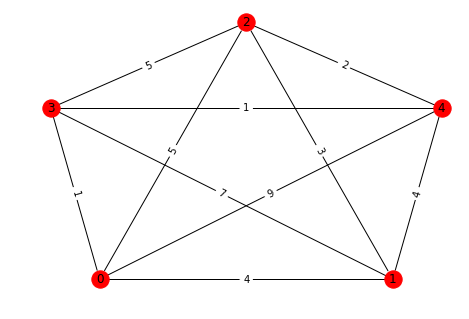

In [17]:
show_matrix(L)

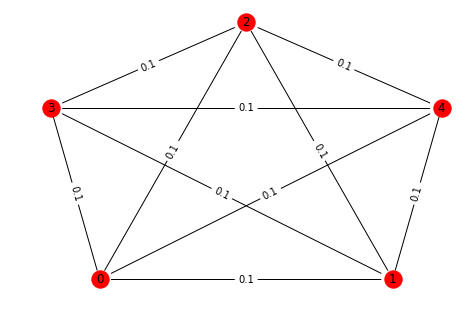

In [18]:
show_matrix(pheromone)

In [19]:
init()
for _ in range(max_iter):     
    # Ready for nex iter, at first itter it does nothing
    tmp_ants = []
    for ant in ants:
        tmp_ants.append([ant[-1]])
    ants = tmp_ants
    
    cycle()

    # Add starting point as the last point of travel
    tmp_ants = []
    for ant in ants:
        temp = ant[:]
        temp.append(ant[0])
        tmp_ants.append(temp)

    ants = tmp_ants
 
    update_pheromones()
    update_elite()

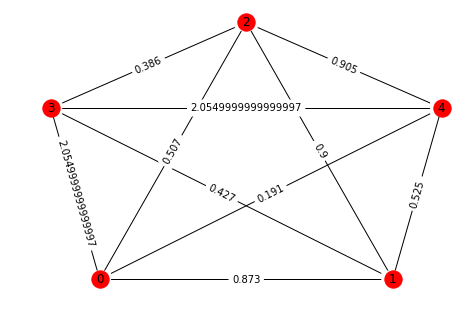

In [20]:
show_matrix(pheromone)

In [21]:
ants.sort()
solutions = list(k for k,_ in itertools.groupby(ants)) # ants

In [22]:
costs = []
for solution in solutions:
    costs.append((cost(solution), solution))

In [23]:
sorted_results = sorted(costs, key=lambda x: x[0])

In [24]:
sorted_results

[(11, [0, 1, 2, 4, 3, 0]),
 (11, [1, 2, 4, 3, 0, 1]),
 (11, [2, 4, 3, 0, 1, 2]),
 (11, [3, 0, 1, 2, 4, 3]),
 (11, [4, 3, 0, 1, 2, 4])]